<a href="https://colab.research.google.com/github/bmfaiml/bmfrepo/blob/main/Unsupervised_Learning_ASSIGNMENT_II_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd

# data is already loaded in a previous cell

# Select relevant features
features = data[['Age', 'TotalAmount', 'Quantity']]

In [14]:
from sklearn.cluster import KMeans

# Initialize KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

# Train the model on the selected features
kmeans.fit(features)

# Get the cluster labels
labels = kmeans.labels_

# Add the cluster labels to your original data or features DataFrame
data['Cluster'] = labels

# Display the first few rows with cluster labels
display(data.head())

,TransactionID,CustomerID,Age,Quantity,Price,PurchaseDate,TotalAmount,PurchaseMonth,PurchaseDayOfWeek,AgeGroup,...,ProductCategory_Books,ProductCategory_Electronics,ProductCategory_Fashion,ProductCategory_Furniture,ProductCategory_Groceries,ProductCategory_Sports,PaymentMode_Cash,PaymentMode_UPI,PaymentMode_Wallet,Cluster
0,T00001,C2824,-0.769570,0.030458,1.402371,2023-03-15,1.074680,3,Wednesday,26-40,...,False,False,True,False,False,False,True,False,False,2
1,T00002,C1409,-1.626186,1.447099,-1.022646,2023-01-22,-0.359843,1,Sunday,19-25,...,True,False,False,False,False,False,False,False,False,0
2,T00003,C5506,0.152939,-1.386183,-1.687615,2023-04-18,-1.261723,4,Tuesday,41-60,...,False,False,False,True,False,False,False,False,True,1
3,T00004,C5012,-1.560293,1.447099,0.317905,2023-08-09,1.301377,8,Wednesday,19-25,...,False,False,False,False,True,False,True,False,False,2
4,T00005,C4657,-0.242422,-1.386183,0.443117,2023-09-23,-0.733639,9,Saturday,41-60,...,False,False,False,False,False,True,False,False,True,1


In [16]:
from sklearn.metrics import silhouette_score

# Compute Inertia (Sum of squared distances of samples to their closest cluster center)
inertia = kmeans.inertia_
print(f"Inertia: {inertia}")

# Compute Silhouette Score
# The silhouette score requires at least 2 clusters and more than 1 sample
if len(data['Cluster'].unique()) > 1 and len(features) > 1:
    silhouette_avg = silhouette_score(features, data['Cluster'])
    print(f"Silhouette Score: {silhouette_avg}")
else:
    print("Cannot compute Silhouette Score: Need more than 1 cluster and 1 sample.")

# Analyze Cluster Centers
cluster_centers = kmeans.cluster_centers_
print("\nCluster Centers:")
print(cluster_centers)

# You can also view the cluster centers with respect to the original feature names
cluster_centers_df = pd.DataFrame(cluster_centers, columns=features.columns)
print("\nCluster Centers with Feature Names:")
display(cluster_centers_df)

Inertia: 2750.259209839462
Silhouette Score: 0.3226229273149798

Cluster Centers:
[[-0.97886125 -0.45904479 -0.27279541]
 [ 0.79340886 -0.60484763 -0.65871905]
 [ 0.11624124  1.1110921   0.98396635]]

Cluster Centers with Feature Names:


,Age,TotalAmount,Quantity
0,-0.978861,-0.459045,-0.272795
1,0.793409,-0.604848,-0.658719
2,0.116241,1.111092,0.983966


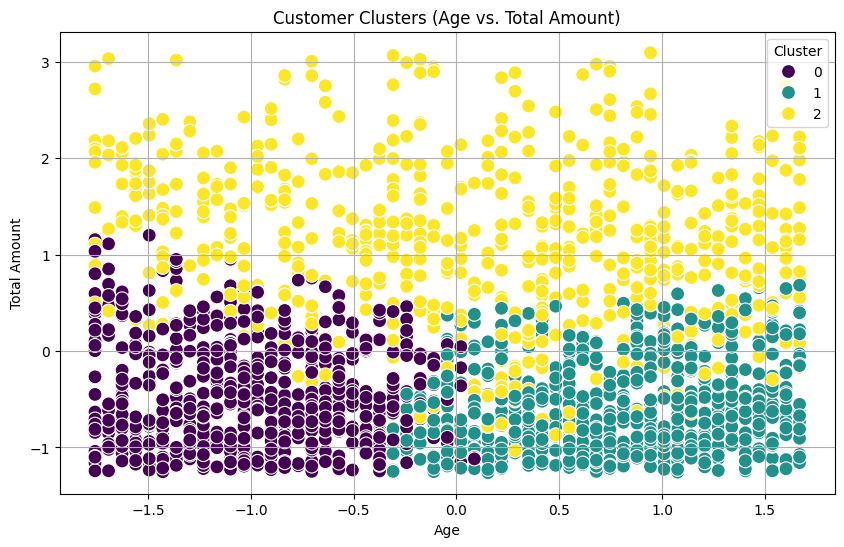

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot clusters in a 2D scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='TotalAmount', hue='Cluster', data=data, palette='viridis', s=100)
plt.title('Customer Clusters (Age vs. Total Amount)')
plt.xlabel('Age')
plt.ylabel('Total Amount')
plt.grid(True)
plt.show()

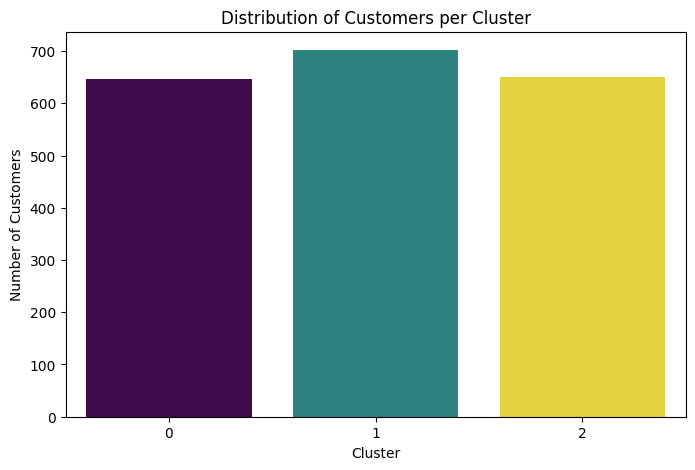

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Show the distribution of customers per cluster
plt.figure(figsize=(8, 5))
sns.countplot(x='Cluster', data=data, palette='viridis', hue='Cluster', legend=False)
plt.title('Distribution of Customers per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()